### Importting DataSet

In [263]:
import pandas as pd


In [264]:
data_df = pd.read_csv('WineQT.csv')
data_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [265]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [266]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [267]:
data_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [268]:
data_df['quality'].dtype

dtype('int64')

In [269]:
col = data_df.columns
col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [270]:
y_train_tensor.unique()

tensor([3, 4, 5, 6, 7, 8])

In [271]:
y_train.nunique()

6

### Data Selection 

In [272]:
x = data_df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density',
            'pH','sulphates','alcohol']]

y = data_df['quality']

### Data Splitting

In [273]:
import torch
import torch.nn as nn
import sklearn
from sklearn.model_selection import train_test_split

In [274]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [275]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 11)
(229, 11)
(914,)
(229,)


### Standard Scalling

In [276]:
from sklearn.preprocessing import StandardScaler

In [277]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [278]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(914, 11)
(229, 11)


### Converting Values into Tensors

In [279]:
x_train_tensor = torch.tensor(x_train_scaled,dtype = torch.float32)
x_test_tensor  = torch.tensor(x_test_scaled,dtype = torch.float32) 

y_train_tensor = torch.tensor(y_train.values, dtype = torch.long)
y_test_tensor = torch.tensor(y_test.values,dtype = torch.long)

In [280]:
print(x_train_tensor.shape, x_train_tensor.dtype)
print(x_test_tensor.shape, x_test_tensor.dtype)
print(y_train_tensor.shape, y_train_tensor.dtype)
print(y_test_tensor.shape, y_test_tensor.dtype)

torch.Size([914, 11]) torch.float32
torch.Size([229, 11]) torch.float32
torch.Size([914]) torch.int64
torch.Size([229]) torch.int64


In [281]:
import torch
import torch.nn as nn

In [282]:
class Winequality(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.input_layer = nn.Linear(input_size,24)
        self.hidden_layer_1 = nn.Linear(24,18)
        self.hidden_layer_2 = nn.Linear(18,12)
        self.output_layer = nn.Linear(12,output_size)

        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden_layer_1(x))
        x = self.relu(self.hidden_layer_2(x))
        x = (self.output_layer(x))

        return x

input_size = x_train.shape[-1]
output_size = y_train.shape[-1]

model = Winequality(input_size,output_size)

### Graph Wiz

In [283]:
from torchview import draw_graph


(process:5000): Pango-WARNING **: 12:32:57.928: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


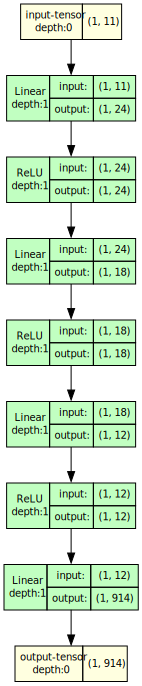

In [284]:
draw_graph(model,input_size=(1,input_size)).visual_graph

### Optimizers and LossFunctions

In [285]:
loss_count = nn.CrossEntropyLoss()

In [286]:
optimizer_wine = torch.optim.Adam(model.parameters(),lr=0.001)

## Evaluation of Model

In [287]:
print(x_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([914, 11])
torch.Size([914])


In [288]:
train_losses = []
test_losses = []

for epochs in range (600):
    
    optimizer_wine.zero_grad()

    outputs_wine = model(x_train_tensor)

    loss = loss_count(outputs_wine,y_train_tensor)

    loss.backward()

    optimizer_wine.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_output = model(x_test_tensor)
        test_loss = loss_count(test_output,y_test_tensor)
        test_losses.append(test_loss.item())
        
    if epochs % 50 == 0:
       print(epochs,loss.item()) 

0 6.816475868225098
50 5.979205131530762
100 1.8379513025283813
150 1.185436725616455
200 1.0637880563735962
250 1.0102449655532837
300 0.9780293703079224
350 0.955156147480011
400 0.935393750667572
450 0.9178810715675354
500 0.9018571376800537
550 0.8862164616584778


### Plotting Graph

In [289]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

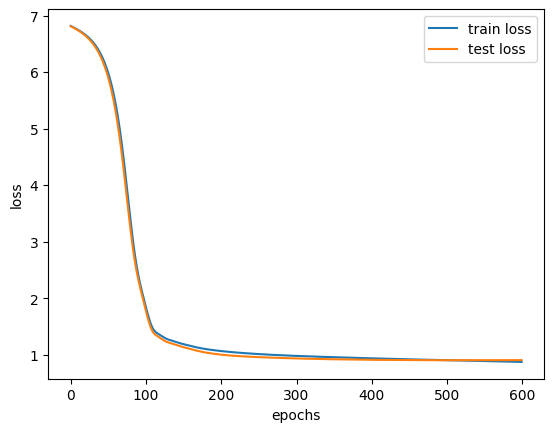

In [290]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

### Confusion Matrix for train data

In [291]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        26
           5       0.67      0.77      0.72       386
           6       0.58      0.59      0.59       370
           7       0.56      0.46      0.51       114
           8       0.00      0.00      0.00        13

    accuracy                           0.62       914
   macro avg       0.30      0.30      0.30       914
weighted avg       0.59      0.62      0.60       914



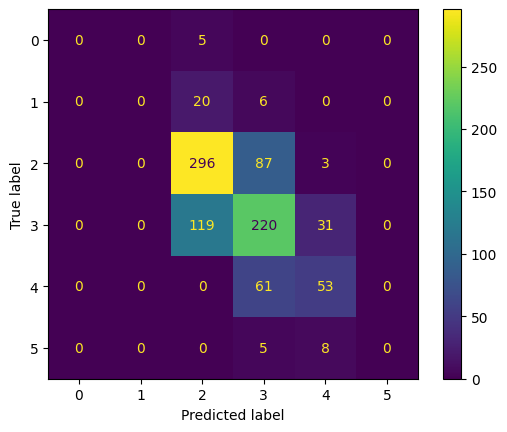

In [292]:
model.eval()
with torch.no_grad():
        output = model(x_train_tensor)
        _,predictions = torch.max(output,1)
        print(classification_report(y_train_tensor,predictions))
        cm= confusion_matrix(y_train_tensor,predictions)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()

### Test Data Confusion matrix

C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.79      0.74        97
           6       0.62      0.60      0.61        92
           7       0.43      0.45      0.44        29
           8       0.00      0.00      0.00         3

    accuracy                           0.63       229
   macro avg       0.29      0.31      0.30       229
weighted avg       0.60      0.63      0.62       229



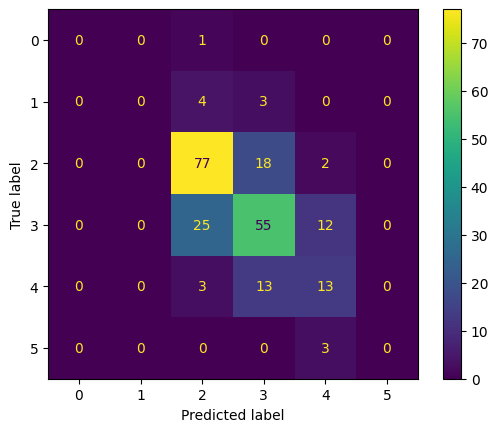

In [293]:
model.eval()
with torch.no_grad():
    output=model(x_test_tensor)
    _,predictions = torch.max(output,1)
    print(classification_report(y_test_tensor,predictions))
    cm = confusion_matrix(y_test_tensor,predictions)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

In [ ]:
loss = 